<a href="https://colab.research.google.com/github/hongtaemin/-/blob/main/%EC%A0%84%ED%99%94%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#한글폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#데이터 불러오기
path = '/content/drive/MyDrive/'

train = pd.read_csv(path + 'train.csv')
sub = pd.read_csv(path + 'sample_submission.csv')
test = pd.read_csv(path + 'test.csv')

train

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [4]:
#테스트 데이터
test

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
1,TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
2,TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
3,TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
4,TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,TEST_12938,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2
12939,TEST_12939,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2
12940,TEST_12940,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2
12941,TEST_12941,23,30,241.3,222,24.7,234.3,93,22.23,223.1,33,9.93,0


In [8]:
# 모르겠음...
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] =  'STIXSizeOneSym'
import matplotlib.font_manager as fm
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier #분류트리(모델) 
from sklearn.model_selection import train_test_split # train/test
from sklearn.datasets import load_wine # dataset 
from sklearn.metrics import accuracy_score, confusion_matrix # 평가 : 분류정확도 
from sklearn.metrics import classification_report # 평가 : 정확률, 재현율, f1_sco

In [10]:
#제출용 파일 확인
sub

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


In [11]:
#train 데이터 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [12]:
#test 데이터 정보
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12943 entries, 0 to 12942
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       12943 non-null  object 
 1   가입일      12943 non-null  int64  
 2   음성사서함이용  12943 non-null  int64  
 3   주간통화시간   12943 non-null  float64
 4   주간통화횟수   12943 non-null  int64  
 5   주간통화요금   12943 non-null  float64
 6   저녁통화시간   12943 non-null  float64
 7   저녁통화횟수   12943 non-null  int64  
 8   저녁통화요금   12943 non-null  float64
 9   밤통화시간    12943 non-null  float64
 10  밤통화횟수    12943 non-null  int64  
 11  밤통화요금    12943 non-null  float64
 12  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.3+ MB


In [13]:
# 데이터 설명
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


In [14]:
test.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
count,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000
mean,159.776713,12.312756,251.066221,159.761724,40.887059,263.656424,159.628216,25.440460,264.052963,157.692112,12.095035,2.301476
std,118.383432,28.069438,85.236623,103.648878,23.062830,75.232035,103.417132,8.288719,74.877379,101.640429,9.459368,2.058855
min,2.000000,0.000000,0.200000,0.000000,0.100000,0.200000,0.000000,0.000000,21.300000,20.000000,2.000000,0.000000
25%,63.000000,0.000000,222.700000,88.000000,24.400000,223.800000,87.000000,22.220000,223.700000,86.000000,4.880000,2.000000
50%,119.000000,1.000000,234.000000,115.000000,30.800000,242.700000,113.000000,23.300000,242.800000,111.000000,9.060000,2.000000
75%,228.000000,22.000000,289.800000,223.000000,45.900000,290.350000,223.000000,28.820000,290.700000,223.000000,20.290000,2.000000
max,2212.000000,1112.000000,481.800000,489.000000,118.100000,481.500000,490.000000,49.990000,481.700000,489.000000,44.980000,11.000000


In [15]:
#결측치 확인
len(train) - train.count()

ID         0
가입일        0
음성사서함이용    0
주간통화시간     0
주간통화횟수     0
주간통화요금     0
저녁통화시간     0
저녁통화횟수     0
저녁통화요금     0
밤통화시간      0
밤통화횟수      0
밤통화요금      0
상담전화건수     0
전화해지여부     0
dtype: int64

In [16]:
len(test) - test.count()

ID         0
가입일        0
음성사서함이용    0
주간통화시간     0
주간통화횟수     0
주간통화요금     0
저녁통화시간     0
저녁통화횟수     0
저녁통화요금     0
밤통화시간      0
밤통화횟수      0
밤통화요금      0
상담전화건수     0
dtype: int64

In [17]:
#중복된 데이터 확인
train[train.duplicated()]

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부


In [18]:
test[test.duplicated()]

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수


> 결측치, 중복된 데이터 없음

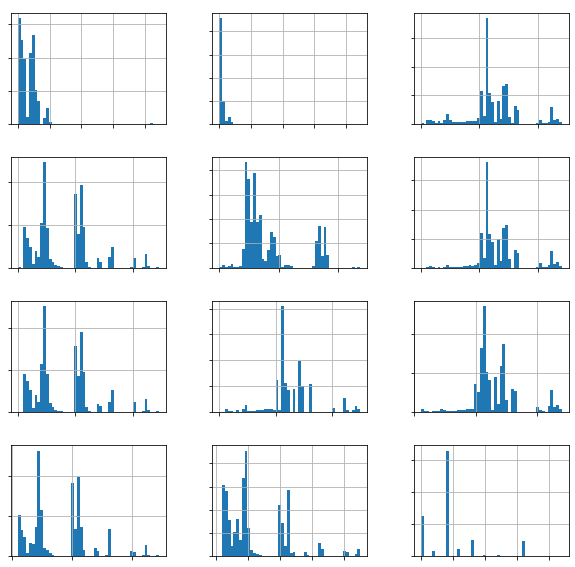

In [19]:
# 히스토그램 분포
train.drop(['전화해지여부'], axis=1).hist(bins=50, figsize=(10, 10))
plt.show()

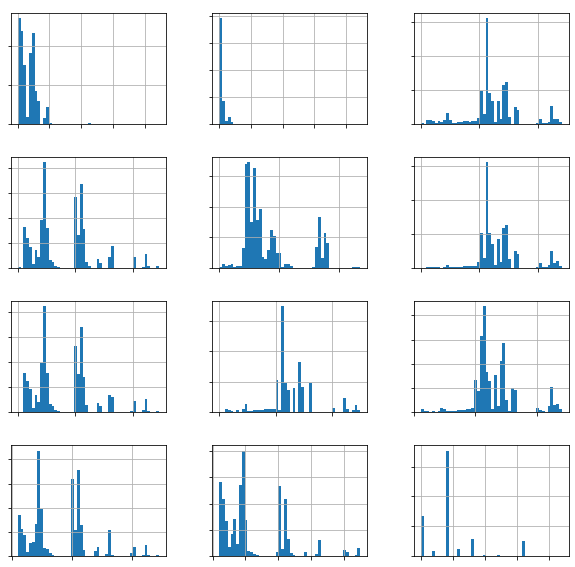

In [20]:
test.hist(bins=50, figsize=(10, 10))
plt.show()

>가입일, 음성사서함이용의 칼럼이 앞쪽으로 쏠려있는 형태를 알 수 있다.
>>train, test의 분포가 비슷한 것으로 보아 계층적으로 잘 추출 되었다

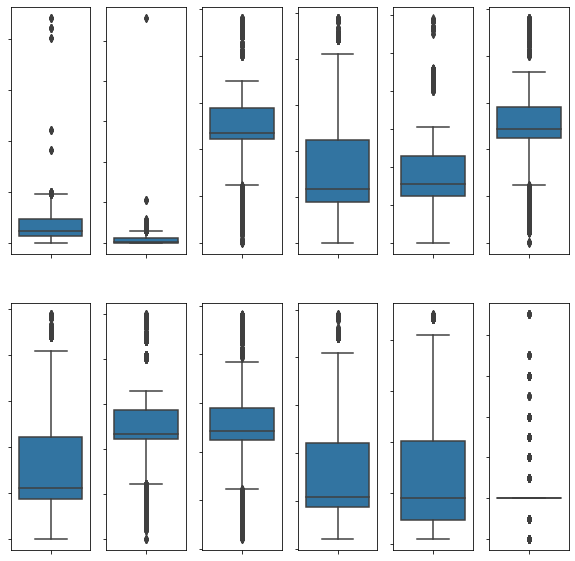

In [21]:
#boxplot 통한 이상치 확인
fig, ax = plt.subplots(2,6, figsize=(10,10))
sns.boxplot(train["가입일"],ax = ax[0,0])
sns.boxplot(train["음성사서함이용"],ax = ax[0,1])
sns.boxplot(train["주간통화시간"],ax = ax[0,2])
sns.boxplot(train["주간통화횟수"],ax = ax[0,3])
sns.boxplot(train["주간통화요금"],ax = ax[0,4])
sns.boxplot(train["저녁통화시간"],ax = ax[0,5])
sns.boxplot(train["저녁통화횟수"],ax = ax[1,0])
sns.boxplot(train["저녁통화요금"],ax = ax[1,1])
sns.boxplot(train["밤통화시간"],ax = ax[1,2])
sns.boxplot(train["밤통화횟수"],ax = ax[1,3])
sns.boxplot(train["밤통화요금"],ax = ax[1,4])
sns.boxplot(train["상담전화건수"],ax = ax[1,5])
plt.show()

> 상담전화건수의 데이터는 의미없어 보임.
>> 가입일과 음성사서함이용에는 이상치 처리가 필요해 보임
>>> 주간, 저녁, 밤을 나누어서 분석하면 좋을 듯함.

In [22]:
train = train[train['가입일']<500]
train = train[train["음성사서함이용"]<220]
train

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


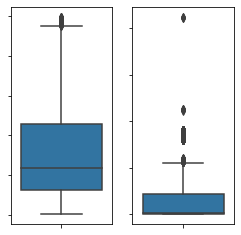

In [23]:
fig, ax = plt.subplots(1,2,figsize=(4, 4))
sns.boxplot(train['가입일'], ax=ax[0])
sns.boxplot(train['음성사서함이용'], ax=ax[1])
plt.show()

<Axes: >

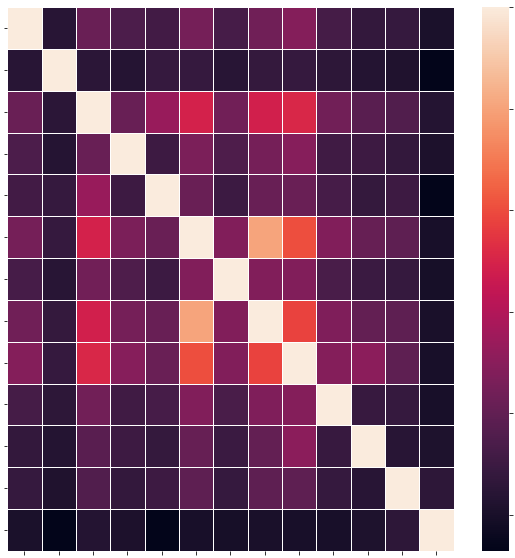

In [24]:
corr = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidth=1)

# 변수끼리의 다중공선성 있어 보암.


In [27]:
train = pd.read_csv(path + 'train.csv')
train = train.drop(train.columns[range(6,9)], axis =1)
train = train.drop(train.columns[0], axis =1)
train

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,329,0,99.2,93,27.3,262.9,328,32.89,2,0
1,2,80,323.9,323,83.7,322.8,209,32.32,2,0
2,93,28,282.4,323,34.2,280.8,328,8.28,0,0
3,223,1,221.4,223,25.1,203.8,234,9.36,0,0
4,222,0,96.3,222,28.7,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...
30195,263,80,289.6,201,21.8,208.0,66,9.28,2,0
30196,283,81,210.7,280,90.5,287.8,203,6.28,2,0
30197,24,0,222.4,33,22.1,293.6,95,4.22,2,0
30198,63,1,262.4,202,29.6,280.9,207,20.88,2,1


In [31]:
test = pd.read_csv(path + 'test.csv')
test = test.drop(test.columns[range(6,9)], axis=1)
test = test.drop(test.columns[0], axis=1)
test

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,110,0,210.7,142,35.6,120.9,111,5.37,2
1,283,1,268.5,100,30.3,290.0,89,8.82,0
2,34,1,243.3,205,21.3,92.6,29,2.44,2
3,209,86,83.0,93,24.1,266.9,81,2.80,6
4,202,0,293.2,23,31.0,223.8,33,6.66,2
...,...,...,...,...,...,...,...,...,...
12938,322,1,282.4,202,89.9,293.6,321,8.88,2
12939,222,0,233.5,209,34.6,224.4,202,9.63,2
12940,98,29,223.4,209,29.3,230.0,208,22.26,2
12941,23,30,241.3,222,24.7,223.1,33,9.93,0


In [37]:
X_train = train.iloc[:,range(0,9)]
X_train

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,329,0,99.2,93,27.3,262.9,328,32.89,2
1,2,80,323.9,323,83.7,322.8,209,32.32,2
2,93,28,282.4,323,34.2,280.8,328,8.28,0
3,223,1,221.4,223,25.1,203.8,234,9.36,0
4,222,0,96.3,222,28.7,263.1,223,2.80,8
...,...,...,...,...,...,...,...,...,...
30195,263,80,289.6,201,21.8,208.0,66,9.28,2
30196,283,81,210.7,280,90.5,287.8,203,6.28,2
30197,24,0,222.4,33,22.1,293.6,95,4.22,2
30198,63,1,262.4,202,29.6,280.9,207,20.88,2


In [40]:
y_train = train["전화해지여부"]
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30195    0
30196    0
30197    0
30198    1
30199    0
Name: 전화해지여부, Length: 30200, dtype: int64

In [42]:
X_test = test.iloc[:,range(0,9)]
X_test

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,110,0,210.7,142,35.6,120.9,111,5.37,2
1,283,1,268.5,100,30.3,290.0,89,8.82,0
2,34,1,243.3,205,21.3,92.6,29,2.44,2
3,209,86,83.0,93,24.1,266.9,81,2.80,6
4,202,0,293.2,23,31.0,223.8,33,6.66,2
...,...,...,...,...,...,...,...,...,...
12938,322,1,282.4,202,89.9,293.6,321,8.88,2
12939,222,0,233.5,209,34.6,224.4,202,9.63,2
12940,98,29,223.4,209,29.3,230.0,208,22.26,2
12941,23,30,241.3,222,24.7,223.1,33,9.93,0


In [43]:
model = RandomForestClassifier() # 분류 트리(default) 객체 생성
model.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [44]:
pred = model.predict(X = X_test)


In [45]:
sub = pred
pd.DataFrame(sub)

,0
0,0
1,0
2,0
3,0
4,1
...,...
12938,0
12939,0
12940,0
12941,0


In [47]:
sub = pd.read_csv(path + 'sample_submission.csv')
sub
sub["전화해지여부"] = pred
sub
sub.to_csv("20190665.csv", index=False)